## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Aviation_Data.csv')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
# Event.Id #drop, uninformative
# Investigation.Type #drop, uninformative
# Accident.Number 
# Event.Date #split into month and year
# Location #keep to view specifics of US incidents
# Country #keep but change to US and non-US
# Injury.Severity  #drop b/c repeats info from the later injury categories 
# Aircraft.damage #keep
# Registration.Number #drop, uninformative
# Make #keep, maybe use to engineer a new feature using LLM 
# Model #keep, maybe use to engineer a new feature using LLM 
# Amateur.Built #keep: few nan (1.5k) vals, most are not amateur built (80k)
# Number.of.Engines #keep: few NAN values (7.5k), most are have 1 (70k)
# Engine.Type #keep, few unknown (2k) and nan vals (8.5k), most are reciprocating (70k)
# Purpose.of.flight #keep: few unknown (6.8k) and nan (7.6k) vals, most are personal (50k)
# Total.Fatal.Injuries #keep
# Total.Serious.Injuries #keep
# Total.Minor.Injuries #keep
# Total.Uninjured #keep
# Weather.Condition #keep, mostly split between low and high visibility 
# Report.Status #DROP, about 70k are probable cause or nan 
# Publication.Date #DROP, less important than event date; also, skewed towards 2020

In [6]:
#drop columns with more than 20% nans 
nan_cols = list(df.loc[:,df.isna().sum()/len(df) > .2].columns) 

#drop uninformative columns
nan_cols.extend(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Injury.Severity', 'Registration.Number', 'Report.Status', 'Publication.Date'])
nan_cols

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier',
 'Broad.phase.of.flight',
 'Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Injury.Severity',
 'Registration.Number',
 'Report.Status',
 'Publication.Date']

In [7]:
# get a list of columns to keep
non_nan_cols = [x for x in df.columns if x not in nan_cols]
non_nan_cols

['Event.Date',
 'Location',
 'Country',
 'Aircraft.damage',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition']

In [8]:
# remove columns from df
df = df[non_nan_cols].copy()
df.head()

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


## Engineered Features

In [9]:
# Check if any of the injury columns have true values. If any do, fill nans with 0s. 
# If all columns are nans, assume the data was not logged and keep them as nans. 
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_data_exists = df[injury_cols].apply(lambda col: any(col), axis = 1)

for col in injury_cols:
    df.loc[injury_data_exists & df[col].isna(), col] = 0

In [10]:
#Make note of dividing by zero situation in pecert. Injured and Percent.Died / Number of Passengers

df['Total.Passengers'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']+ df['Total.Uninjured']
df['Total.Injured'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
df['Percent.Injured'] = (df['Total.Injured'] / df['Total.Passengers']) * 100
df['Percent.Uninjured'] = (df['Total.Uninjured'] / df['Total.Passengers']) * 100
df['Percent.Died'] = (df['Total.Fatal.Injuries'] / df['Total.Passengers']) * 100
df.loc[df['Total.Passengers'] == 0, ['Percent.Injured','Percent.Died']] = 0
df['Injured.Category'] = df['Percent.Injured'].apply(lambda x: 'High' if x >= 50 else 'Low')

In [11]:
#Aircraft Capacity
print(df['Total.Passengers'].apply(lambda x: 'Private' if x < 50 else 'Commercial').value_counts(dropna=False))
print("----------------------------")
df['Passenger.Load'] = df['Total.Passengers'].apply(lambda x: 'Private' if x < 50 else 'Commercial')
df.head()

Private       88061
Commercial     2287
Name: Total.Passengers, dtype: int64
----------------------------


,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Injured.Category,Passenger.Load
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,...,0.0,0.0,UNK,2.0,2.0,100.0,0.0,100.000000,High,Private
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,...,0.0,0.0,UNK,4.0,4.0,100.0,0.0,100.000000,High,Private
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,...,0.0,0.0,IMC,3.0,3.0,100.0,0.0,100.000000,High,Private
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,...,0.0,0.0,IMC,2.0,2.0,100.0,0.0,100.000000,High,Private
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,No,NaN,NaN,Personal,...,0.0,0.0,VMC,3.0,3.0,100.0,0.0,33.333333,High,Private


## Cleaning

In [12]:
# Remove rows where Amateur.Built is Yes or NaN, then remove Amateur.Built column
df = df.drop(df.loc[(df['Amateur.Built']=='Yes') |( df['Amateur.Built'].isna())].index)
df.reset_index(drop = True, inplace = True)
df.drop(columns = 'Amateur.Built', inplace = True)
df.head()

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Injured.Category,Passenger.Load
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,...,0.0,0.0,UNK,2.0,2.0,100.0,0.0,100.000000,High,Private
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,...,0.0,0.0,UNK,4.0,4.0,100.0,0.0,100.000000,High,Private
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,...,0.0,0.0,IMC,3.0,3.0,100.0,0.0,100.000000,High,Private
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,...,0.0,0.0,IMC,2.0,2.0,100.0,0.0,100.000000,High,Private
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,...,0.0,0.0,VMC,3.0,3.0,100.0,0.0,33.333333,High,Private


In [13]:
# Clean Weather Condition
df['Weather.Condition'].replace({'Unk':'Unknown'}, inplace = True)
df['Weather.Condition'].fillna('Unknown', inplace = True)
df['Weather.Condition'].value_counts(dropna=False)

VMC        69084
IMC         5831
Unknown     4607
UNK          790
Name: Weather.Condition, dtype: int64

In [14]:
# Check if Number.of.Engines = 0 corresponds to no Engine.Type
df[(df['Number.of.Engines']==0) & ((df['Engine.Type']!='NONE') & (df['Engine.Type'].notna())\
                                   & (df['Engine.Type'] != 'Unknown'))]

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Injured.Category,Passenger.Load
21149,1989-03-31,"GREAT HARBOR, Bahamas",Bahamas,Destroyed,Cessna,421B,0.0,Reciprocating,Unknown,1.0,...,0.0,1.0,VMC,2.0,1.0,50.0,50.0,50.0,High,Private
67210,2013-09-02,"Hampshire, IL",United States,Substantial,SCHWEIZER,SGS 2 33A,0.0,None,Instructional,0.0,...,0.0,1.0,VMC,1.0,0.0,0.0,100.0,0.0,Low,Private
67790,2014-03-15,"Wrightwood, CA",United States,Substantial,DG FLUGZEUGBAU GMBH,DG 1000S,0.0,None,Personal,0.0,...,0.0,1.0,VMC,2.0,1.0,50.0,50.0,0.0,High,Private
68251,2014-07-04,"Nephi, UT",United States,Substantial,CENTRAIR,101A,0.0,None,Personal,0.0,...,0.0,0.0,VMC,1.0,1.0,100.0,0.0,0.0,High,Private
69487,2015-06-14,"Pell City, AL",United States,Substantial,WEATHERLY,201B,0.0,Reciprocating,Aerial Application,0.0,...,0.0,1.0,VMC,1.0,0.0,0.0,100.0,0.0,Low,Private
72160,2017-04-22,"Park City, UT",United States,Substantial,BALONY KUBICEK SPOL SRO,BB70Z,0.0,None,Business,0.0,...,0.0,9.0,VMC,9.0,0.0,0.0,100.0,0.0,Low,Private
72596,2017-07-21,"Deatsville, AL",United States,Substantial,LET,L23,0.0,None,Instructional,0.0,...,0.0,0.0,VMC,1.0,1.0,100.0,0.0,0.0,High,Private
73491,2018-03-28,"Cave Creek, AZ",United States,Destroyed,ULTRAMAGIC SA,N 300,0.0,None,Business,0.0,...,0.0,13.0,VMC,13.0,0.0,0.0,100.0,0.0,Low,Private
73682,2018-05-13,"Tunbridge, VT",United States,Substantial,SCHWEIZER,SGS123,0.0,None,Personal,0.0,...,0.0,1.0,VMC,1.0,0.0,0.0,100.0,0.0,Low,Private
77888,2021-05-16,"Hampshire, IL",United States,Substantial,I.C.A.-BRASOV (ROMANIA),IS-28B2,0.0,None,Instructional,0.0,...,1.0,0.0,VMC,2.0,2.0,100.0,0.0,0.0,High,Private


In [15]:
# Replace Number.of.Engines = 0 with Number.of.Engines = Unknown where Engine.Type exists 
replace_indx = list(df[(df['Number.of.Engines']==0) 
                    & ((df['Engine.Type']!='NONE') 
                       & (df['Engine.Type'].notna()) 
                       & (df['Engine.Type'] != 'Unknown'))].index)

df.loc[replace_indx, 'Number.of.Engines'] = 'Unknown'

In [16]:
# Clean Engine Type
df['Engine.Type'] = df.apply(lambda row: 'None' if row['Number.of.Engines']==0 else row['Engine.Type'], axis = 1)
df['Engine.Type'].fillna('UNK', inplace = True)
df['Engine.Type'].replace({'UNK':'Unknown'}, inplace = True)
df['Engine.Type'].value_counts(dropna=False)

Reciprocating      61652
Unknown             7414
Turbo Shaft         3579
Turbo Prop          3314
Turbo Fan           2468
None                1170
Turbo Jet            690
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [17]:
# Aircraft Damage
df['Aircraft.damage'].fillna('Unknown', inplace = True)
df['Aircraft.damage'].value_counts(dropna = False)

Substantial    57928
Destroyed      16407
Unknown         3263
Minor           2714
Name: Aircraft.damage, dtype: int64

In [18]:
#Transform the Event Date into three separate Date columns that specify day, month and year of the incident.
#Dropping 'Event.Date' once the columns are created:

df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Day'] = df['Event.Date'].map(lambda x: x.day)
df['Event.Month'] = df['Event.Date'].map(lambda x: x.month)
df['Event.Year'] = df['Event.Date'].map(lambda x: x.year)
df.drop(['Event.Date'], axis=1, inplace=True)

In [19]:
#Grouping all the Countries outside of the US as "Foreign Country"
df.loc[df['Country'] != 'United States', 'Country'] = 'Foreign Country'

In [20]:
#Filling the Null Values with "UNKNOWN" the the Location Column
df['Location'] = df['Location'].fillna('UNKNOWN')

# Adjusting the Column so it shows code of the corresponding State, if it's Unknown or outside of the US, label accordingly
df['Location'] = df['Location'].apply(lambda location: location.split(', ')[-1] if \
                                      len(location.split(', ')) > 1 and len(location.split(', ')[-1]) == 2 else \
                                      'Unknown/Foreign Location')

In [21]:
#Cleaning the 'Make' Column
characters_to_remove = ['(', ')', ',', '.', '%', '?']
df['Make'] = df['Make'].str.title().fillna('UNKNOWN')
df['Make'] = df['Make'].map(lambda x: ''.join(char for char in x if char not in characters_to_remove))

In [22]:
# #Cleaning the Airport Name Column

# df['Airport.Name'] = df['Airport.Name'].str.title().fillna('UNKNOWN')
# df.loc[df['Airport.Name'].str.contains('private', case=False), 'Airport.Name'] = 'Private'

In [23]:
#Replacing NaN values for 'Unknown in 'Purpose of flight':
df['Purpose.of.flight'].fillna('Unknown', inplace=True)

In [24]:
#Cleaning the "Model" column

df['Model'] = df['Model'].str.title().fillna('UNKNOWN')

In [25]:
# #Cleaning the 'Airplane.Category' Column, making sure that everything we know for sure is not a plane gets dropped:
# #Dropping 'Airplane.Category' after the cleaning of everything that we know is not an airplane.

# df['Aircraft.Category'].fillna('UNKNOWN',inplace = True)
# df = df.loc[(df['Aircraft.Category'] == 'Airplane') | (df['Aircraft.Category'] == 'UNKNOWN')]
# df.drop('Aircraft.Category', axis=1, inplace=True)

## Visualize KPIs

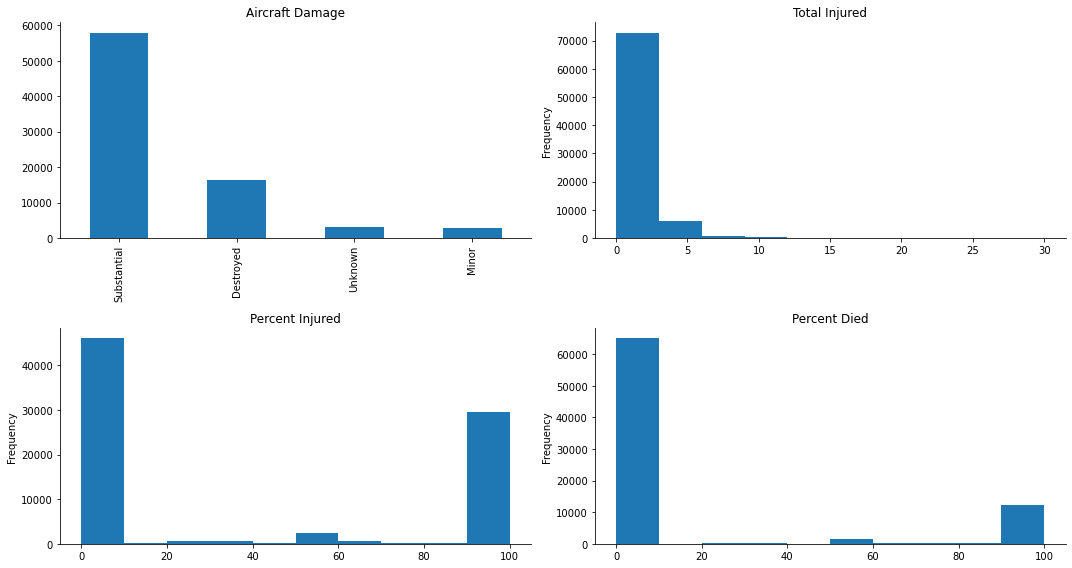

In [26]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

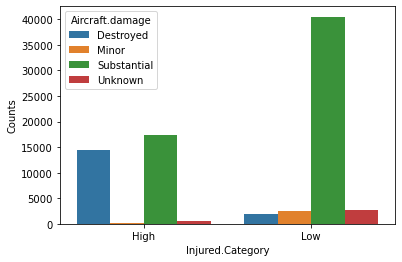

In [27]:
gb = df.groupby(['Injured.Category', 'Aircraft.damage']).size().reset_index(name='Counts')
sns.barplot(data=gb, x = "Injured.Category", y = "Counts", hue = "Aircraft.damage");

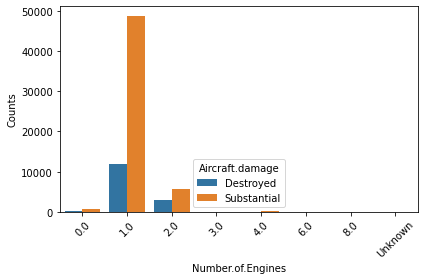

In [28]:
feature = 'Number.of.Engines'
gb2 = df[(df['Aircraft.damage'] == 'Substantial') | (df['Aircraft.damage'] == 'Destroyed')].groupby([feature, 'Aircraft.damage']).size().reset_index(name="Counts")
sns.barplot(data=gb2, x = feature, y = "Counts", hue = "Aircraft.damage")
plt.xticks(rotation=45)
plt.tight_layout()

In [29]:
#gb3 = df[(df['Aircraft.damage'] == 'Substantial') | (df['Aircraft.damage'] == 'Destroyed')].groupby(['Popularity', 'Aircraft.damage']).size().reset_index(name="Counts")
# gb3 = df.groupby(['Popularity', 'Aircraft.damage']).size().reset_index(name="Counts")
# sns.barplot(data=gb3, x = "Popularity", y = "Counts", hue = "Aircraft.damage")
# plt.xticks(rotation=45)
# plt.tight_layout()

In [30]:
df_priv = df[df['Passenger.Load'] == 'Private'].reset_index(drop = True)
df_comm = df[df['Passenger.Load'] == 'Commercial'].reset_index(drop = True)

In [31]:
pop_makes_priv = df_priv['Make'].value_counts()
pop_makes_priv = list(pop_makes_priv[pop_makes_priv > 100].index)

pop_makes_comm = df_comm['Make'].value_counts()
pop_makes_comm = list(pop_makes_comm[pop_makes_comm > 100].index)
pop_makes_comm

['Boeing', 'Mcdonnell Douglas', 'Airbus Industrie', 'Airbus']

In [32]:
make_percentages = pd.DataFrame(columns = ['Destroyed_Percent', 'Substantial_Percent', 'Minor_Percent', 'Num_Incidents'])

for make in pop_makes_priv:
    make_info = df[df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)
    make_info_p = make_info * 100

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0
        make_info_p['Minor'] = 0

    num_incidents = df['Make'].value_counts()[make]
    
    make_percentages.loc[make] =[make_info_p['Destroyed'], make_info_p['Substantial'], make_info_p['Minor'], num_incidents]

make_percentages.sort_values(by='Num_Incidents', ascending=False).head()

,Destroyed_Percent,Substantial_Percent,Minor_Percent,Num_Incidents
Cessna,19.096388,78.407957,1.419751,27047.0
Piper,23.014105,74.677735,1.376797,14817.0
Beech,29.446936,65.975336,3.120329,5352.0
Bell,25.832717,69.948187,1.739452,2702.0
Boeing,5.967383,27.057079,25.759822,2698.0


## Damage Index for Private Planes

In [35]:
pop_means_priv_df = df_priv.groupby('Make').mean(numeric_only=True)

di_df_priv = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in pop_makes_priv:
    make_info = df[df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_priv_df.loc[make, ['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']])
    
    di_df_priv.loc[make] =[damage_index, num_incidents] + make_stats

di_df_priv.sort_values(by='Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P
Airbus,0.712803,289.0,65.464835,7.936653,3.209110
Boeing,1.037435,2698.0,76.440891,13.754261,4.040946
Balloon Works,1.238095,147.0,59.048833,40.951167,4.557823
Embraer,1.357143,238.0,71.733027,24.447112,16.946431
Mcdonnell Douglas,1.459866,598.0,67.627114,28.228260,11.071964
Douglas,1.891304,276.0,64.349614,34.245445,18.688244
Dehavilland,1.940594,101.0,69.719472,30.280528,12.846142
Fairchild,2.018634,161.0,68.306338,30.891291,12.691779
Swearingen,2.050847,177.0,75.908630,23.954487,14.370942
Robinson Helicopter,2.086957,230.0,58.406114,41.413043,13.804348


In [36]:
threshold = 1000
penalty_rate = 0.5
di_df_priv['Penalty'] = di_df_priv['Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df_priv['Adj_Damage_Index'] = di_df_priv['Damage_Index'] * di_df_priv['Penalty'] 
di_df_priv.sort_values(by = 'Adj_Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,1.037435,2698.0,76.440891,13.754261,4.040946,1.000000,1.037435
Airbus,0.712803,289.0,65.464835,7.936653,3.209110,1.620664,1.155214
Mcdonnell Douglas,1.459866,598.0,67.627114,28.228260,11.071964,1.257082,1.835172
Embraer,1.357143,238.0,71.733027,24.447112,16.946431,1.717742,2.331222
Cessna,2.346212,27047.0,63.260890,36.603215,15.307247,1.000000,2.346212
Robinson,2.406557,1220.0,51.620757,47.506831,25.374317,1.000000,2.406557
Balloon Works,1.238095,147.0,59.048833,40.951167,4.557823,1.958661,2.425009
Piper,2.427887,14817.0,58.014156,41.869626,19.549321,1.000000,2.427887
Bellanca,2.431731,1040.0,54.980751,44.975962,19.094551,1.000000,2.431731
Bell,2.449667,2702.0,50.307724,49.066985,17.323181,1.000000,2.449667


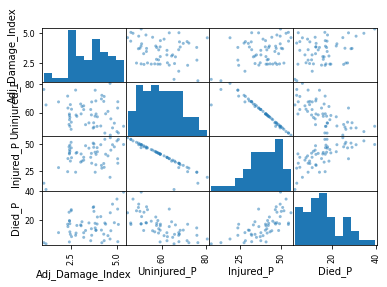

In [37]:
pd.plotting.scatter_matrix(di_df_priv[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

## Damage Index for Commercial Planes

In [38]:
pop_means_comm_df = df_comm.groupby('Make').mean(numeric_only=True)

di_df_comm = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in pop_makes_comm:
    make_info = df[df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_comm_df.loc[make, ['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']])
    
    di_df_comm.loc[make] =[damage_index, num_incidents] + make_stats

di_df_comm.sort_values(by='Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P
Airbus,0.712803,289.0,91.631276,8.368724,7.002849
Airbus Industrie,0.791139,158.0,92.531390,7.468610,5.033757
Boeing,1.037435,2698.0,93.389535,6.610465,4.530850
Mcdonnell Douglas,1.459866,598.0,93.387689,6.612311,2.956278


In [39]:
threshold = 1000
penalty_rate = 0.5
di_df_comm['Penalty'] = di_df_comm['Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df_comm['Adj_Damage_Index'] = di_df_comm['Damage_Index'] * di_df_comm['Penalty'] 
di_df_comm.sort_values(by = 'Adj_Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,1.037435,2698.0,93.389535,6.610465,4.530850,1.000000,1.037435
Airbus,0.712803,289.0,91.631276,8.368724,7.002849,1.620664,1.155214
Airbus Industrie,0.791139,158.0,92.531390,7.468610,5.033757,1.922580,1.521029
Mcdonnell Douglas,1.459866,598.0,93.387689,6.612311,2.956278,1.257082,1.835172


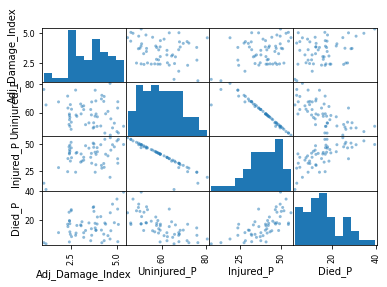

In [40]:
pd.plotting.scatter_matrix(di_df_priv[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);